<a href="https://colab.research.google.com/github/usmanjaved-07/AI-Lab-Task/blob/main/Final_RNN_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6917 - loss: 0.6327 - val_accuracy: 0.8402 - val_loss: 0.4093 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.8755 - loss: 0.3355 - val_accuracy: 0.8544 - val_loss: 0.3787 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9054 - loss: 0.2683 - val_accuracy: 0.8674 - val_loss: 0.3444 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9336 - loss: 0.1994 - val_accuracy: 0.8738 - val_loss: 0.3407 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9470 - loss: 0.1739 - val_accuracy: 0.8602 - val_loss: 0.3536 - learning_rate: 0.0010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9529 - loss: 0.1520 - val_accuracy: 0.8572 - val_loss: 0.4320 - learning_rate: 0.0010
Epoch 7/10
625/625 ━━━━━━

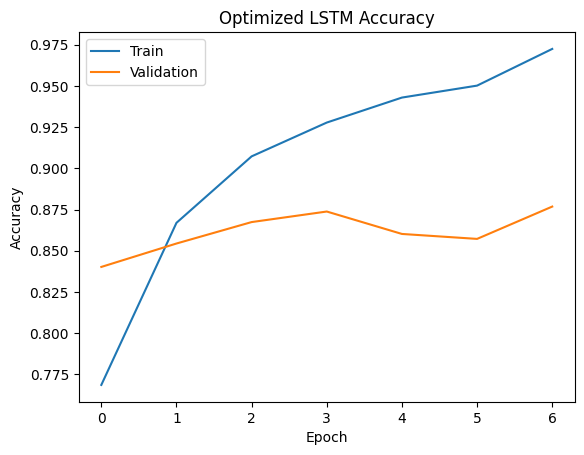

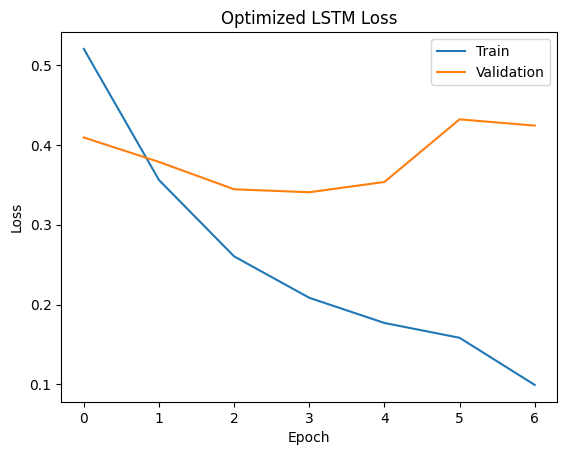

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted Sentiment: Negative


In [ ]:
# 1. Import libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 2. Parameters
max_features = 10000
maxlen = 500
embedding_dim = 128

# 3. Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 5. Build optimized model
model = Sequential()

# Embedding + SpatialDropout1D (overfitting control)
model.add(Embedding(max_features, embedding_dim))
model.add(SpatialDropout1D(0.3))  # Powerful anti-overfitting

# First LSTM + Dropout + L2 regularization
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

# Second LSTM + Dropout + L2 regularization
model.add(LSTM(64, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# 6. Compile with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 7. Callbacks for over/underfitting control
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# 8. Train model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr]
)

# 9. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🔥 Final Test Accuracy: {test_acc:.4f}")

# 10. Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Optimized LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# 11. Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Optimized LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 12. Predict on sample
sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")


Imports

Imported LSTM and SpatialDropout1D instead of SimpleRNN.

Imported Dropout, l2, Adam, EarlyStopping, ReduceLROnPlateau for regularization and training control.

1.  Data Preprocessing

Padded sequences to maxlen=500 for uniform input length.

Kept num_words=10000 to limit vocabulary and reduce sparsity.

2.  Embedding Layer

Increased embedding dimension from 32 → 128 for richer word representations.

Added SpatialDropout1D(0.3) to prevent overfitting in embeddings.

3.  First LSTM Layer

Replaced SimpleRNN with LSTM.

Increased LSTM units from 64 → 128 for higher capacity.

Set return_sequences=True to allow stacking another LSTM.

Added kernel_regularizer=l2(0.001) to penalize large weights.

Added Dropout(0.3) after LSTM for additional overfitting control.

4.  Second LSTM Layer

Added second LSTM layer.

Increased units from 32 → 64 for deeper sequence modeling.

Added kernel_regularizer=l2(0.001) for regularization.

Added Dropout(0.3) after second LSTM for overfitting control.

5.  Output Layer

Kept Dense(1, activation='sigmoid') for binary sentiment classification.

6.  Optimizer & Learning Rate

Used Adam optimizer with learning_rate=0.001 for stable training.

7. Callbacks for Training

Added EarlyStopping(patience=3) to stop training if validation loss stops improving.

Added ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-5) to reduce learning rate on plateau.

8.  Training Settings

Increased epochs from 5 → 10 for longer training.

Reduced batch_size from 64 → 32 for better generalization.

Used validation_split=0.2 to monitor validation performance during training.

9.  Evaluation & Prediction

Evaluated on test set to measure real accuracy.

Plotted training/validation accuracy and loss to visualize overfitting/underfitting.

Predicted sentiment on a sample review to check model output.

10.  Overall Effect

Overfitting controlled via Dropout, SpatialDropout1D, L2, EarlyStopping.

Underfitting avoided with bigger embedding, stacked LSTM, and sufficient epochs.
